In [ ]:
!sudo pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving continents2.csv to continents2.csv
Saving CONVENIENT_global_confirmed_cases.csv to CONVENIENT_global_confirmed_cases.csv
Saving CONVENIENT_global_deaths.csv to CONVENIENT_global_deaths.csv


{'continents2.csv': b'\xef\xbb\xbfname,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code\r\nAfghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,,142,34,\r\n\xc3\x85land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,,150,154,\r\nAlbania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,,150,39,\r\nAlgeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,,2,15,\r\nAmerican Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,,9,61,\r\nAndorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,,150,39,\r\nAngola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2,202,17\r\nAnguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Latin America and the Caribbean,Caribbean,19,419,29\r\nAntarctica,AQ,ATA,10,ISO 3166-2:AQ,,,,,,\r\nAntigua and Barbuda,AG,ATG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19,419,29\r\nArgentina,AR,ARG,32,ISO 3166-2:AR,Americas,Latin America and the Caribbean,South 

#importing libarys 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from prophet import Prophet
from sklearn.metrics import r2_score
plt.style.use("ggplot")

In [ ]:
global_cases = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
global_deaths = pd.read_csv("CONVENIENT_global_deaths.csv")
continent=pd.read_csv('/content/continents2.csv')

In [ ]:
global_cases.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we cant drop or impute the NaN valuse cause it represents the data and change it will cause missleading

In [ ]:
global_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Columns: 290 entries, Country/Region to Zimbabwe
dtypes: float64(198), object(92)
memory usage: 2.2+ MB


In [ ]:
global_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Columns: 290 entries, Country/Region to Zimbabwe
dtypes: float64(198), object(92)
memory usage: 2.2+ MB


now we will simply combine the above datasets into one DS 

In [ ]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = global_cases.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(global_cases[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()

In [ ]:
world.head()

,Country,Cases
0,Afghanistan,201949.0
1,Albania,332739.0
2,Algeria,270771.0
3,Andorra,46449.0
4,Angola,103131.0


#Data Visualization 

In [ ]:
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [ ]:
continent["name"]=continent["name"].str.upper()
world["Cases Range"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])
alpha =[]
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES" 
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else :
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha
world["Alpha3"].isnull().sum()

15

#Geographical Plot
ploting geographical plot of the data to visualize the worldwide spread of Covid-19

In [ ]:
fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white","khaki","yellow","orange","red"])
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
global_cases

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,10/17/22,64.0,7.0,17.0,0.0,0.0,0.0,0.0,0.0,387.0,...,964.0,39.0,0.0,0.0,673.0,0.0,0.0,0.0,20.0,0.0
1000,10/18/22,227.0,28.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,54.0,623.0,0.0,0.0,0.0,0.0,0.0
1001,10/19/22,54.0,28.0,2.0,83.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,92.0,1337.0,0.0,0.0,0.0,0.0,0.0
1002,10/20/22,193.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,0.0,541.0,0.0,0.0,0.0,0.0,0.0


visualizing daily covid19 cases and deaths in world

In [ ]:
count = []
for i in range(1,len(global_cases)):
    count.append(sum(pd.to_numeric(global_cases.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = global_cases["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(global_deaths)):
    count.append(sum(pd.to_numeric(global_deaths.iloc[i,1:].values)))

df["Deaths"] = count

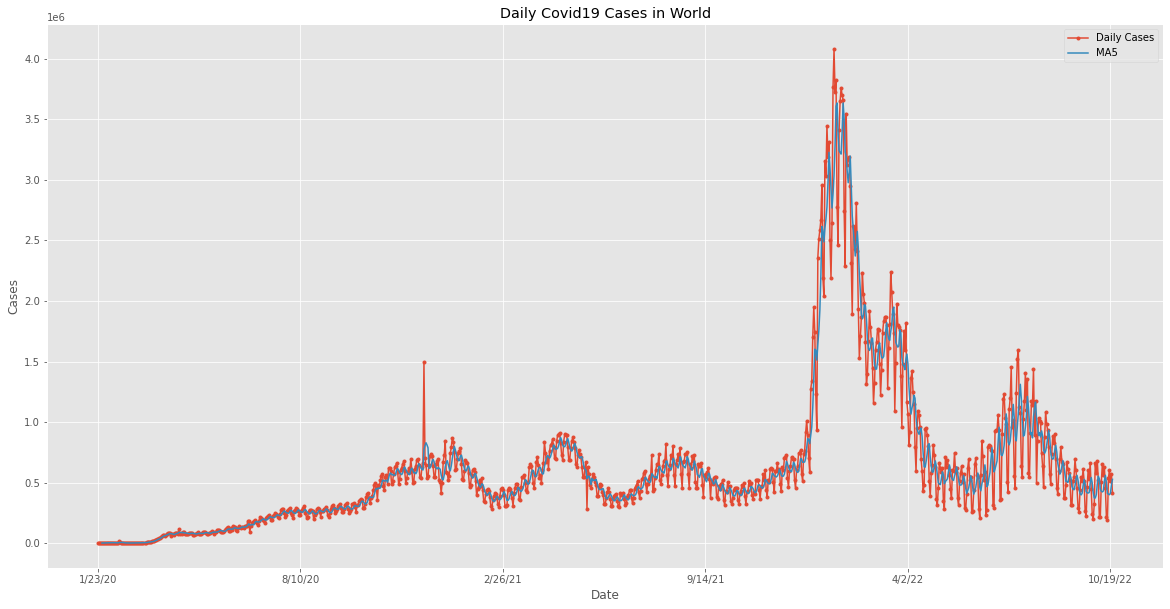

In [ ]:
df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="Daily Cases")
df.Cases.rolling(window=5).mean().plot(figsize=(20,10),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

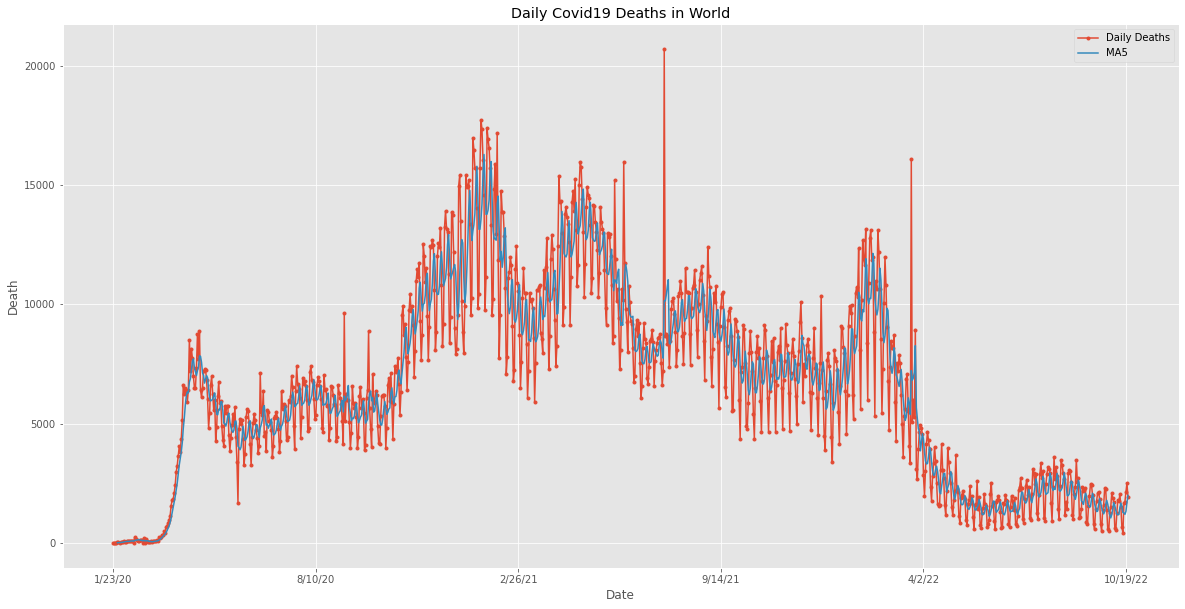

In [ ]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="Daily Deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(20,10),label="MA5")
plt.ylabel("Death")
plt.legend()
plt.show()

#Model Prediction
we will use the Facebook prophet model for the task of Covid-19 cases prediction with Python for the next 30 days

In [ ]:
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values
model=Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
model.fit(df_fb)
future =model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(future)
r2=r2_score(df_fb.y,forcast.yhat[:len(df_fb)])
r2

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjrfm4tjo/jcv6jsxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjrfm4tjo/tneo_ckj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62879', 'data', 'file=/tmp/tmpjrfm4tjo/jcv6jsxp.json', 'init=/tmp/tmpjrfm4tjo/tneo_ckj.json', 'output', 'file=/tmp/tmpjrfm4tjo/prophet_model38emb0rq/prophet_model-20221024154827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.6265377854814391

# forecast the next 30 days

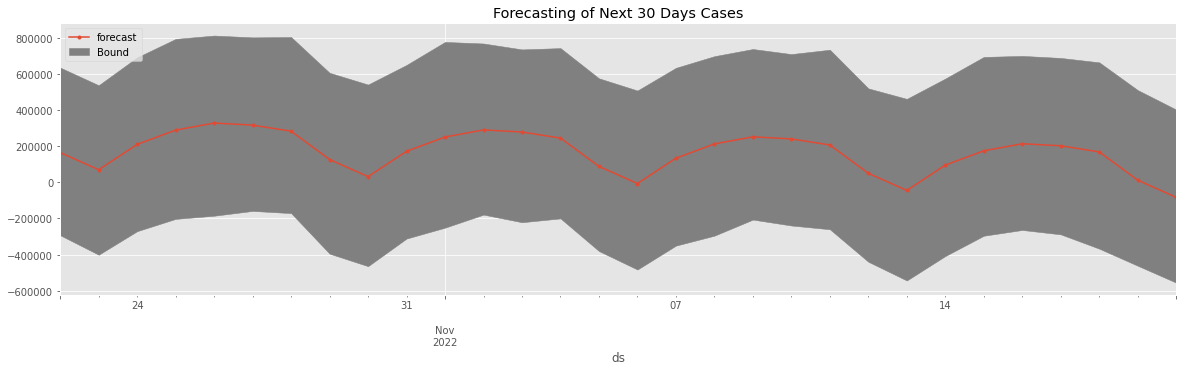

In [ ]:
forecast = forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(20,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()